## 1. Understand the data.
<p>In this assignment, you will delve into the exciting journey of machine learning by applying predictive analytics to solve a real-world problem: condo price prediction. This lab will provide you with hands-on experience in building and evaluating machine learning models using Python and popular libraries such as scikit-learn.</p>
<p>Step 1: As usual, understanding the data is the first step of your machine learning project.</p>

In [1]:
# Importing the pandas package
import pandas as pd

# Reading in condo_price_cm.csv, which is comma delimited.
df=pd.read_csv('condo_price_bkk_and_ptt.csv')

# Print the number of features, number of data points
print(df.shape)

# Print the name of the features of the data points
print(df.columns)

# Clean the columns names
df.columns = [name.strip() for name in list(df.columns)]
print(df.columns)

# Print the information of the dataset and check data types
df.info()

(200, 6)
Index(['Bedroom', 'Bathroom', 'Area', 'Furnish', 'Floor', 'Price'], dtype='object')
Index(['Bedroom', 'Bathroom', 'Area', 'Furnish', 'Floor', 'Price'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Bedroom   200 non-null    int64  
 1   Bathroom  200 non-null    int64  
 2   Area      200 non-null    float64
 3   Furnish   200 non-null    object 
 4   Floor     200 non-null    int64  
 5   Price     200 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


## 2. Data Splitting 
<p>Data splitting, also known as data partitioning or data splitting, is a crucial step in machine learning model development. It involves dividing a dataset into multiple subsets for different purposes, typically training and testing/validation. </p>


In [2]:
# select the dependent and target
sel_feature = ['Bedroom', 'Bathroom', 'Area','Floor']
# sel_feature = ['Area','Floor']
# X=df[sel_feature].values
X=df[sel_feature]
# X = df.columns.drop('Price')
# y=df['Price'].values
y=df['Price']



# Import the libary to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.3, 
                                                    random_state=42)


# Print the size of the training and testing data
print(X_train.shape, X_test.shape)


(140, 4) (60, 4)


## 3. Use Scikit Pipeline
</p>

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
# -------------------------------------------------
# Initialize the binary encoder
# import category_encoders as ce

# if 'Furnish' in sel_feature:

#     binary_encoder = ce.BinaryEncoder(cols=['Furnish'])

#     steps = [
#         ('encoder', binary_encoder),
#             ('scaler', StandardScaler()), 
#             ('poly', PolynomialFeatures(degree = 5, 
#                                         include_bias=False)),
#             ('liReg', LinearRegression())]
# else:
#     steps = [
#             ('scaler', StandardScaler()), 
#             ('poly', PolynomialFeatures(degree = 5, 
#                                         include_bias=False)),
#             ('liReg', LinearRegression())]

# parameters = {"poly__degree":[1,2,3,4,5,6,7,8,9]}
# pipeline = Pipeline(steps)


# poly_grid = GridSearchCV(pipeline, parameters, 
#                          cv=5, 
#                          scoring='neg_mean_squared_error',
#                          verbose= True) 

# poly_grid.fit(X_train, y_train)
# ---------------------------------------------------------




## 4. Check the parameters
<p>Retrieves the value of the parameters corresponding to the minimum cost.</p>

In [4]:
best_parameters = poly_grid.best_params_

# print the values of the parameters 
print ('best order is :', best_parameters)

# best_pipeline = poly_grid.best_estimator_

# linear_model = best_pipeline.named_steps['liReg']
# poly_coeffs = linear_model.coef_
# poly_intercept = linear_model.intercept_

# print(f"Polynomial model coefficients: {poly_coeffs}")
# print(f"Polynomial model intercept: {poly_intercept}")
# for i, coef in enumerate(poly_coeffs):
#     print(f"  β_{i}: {coef}")

# # For better understanding of feature names
# poly = best_pipeline.named_steps['poly']
# feature_names = poly.get_feature_names_out()

# # Print feature names with corresponding coefficients
# print("Model representation:")
# terms = []
# for feature_name, coef in zip(feature_names, poly_coeffs):
#     terms.append(f"{coef} * {feature_name}")

# model_representation = " + ".join(terms)
# model_representation = f"{poly_intercept} + " + model_representation
# print(model_representation)

NameError: name 'poly_grid' is not defined

## 5. Perform the predictions
<p>Now that we have identified the best parameters corresponding to the minimum cost. Make predictions using the function <b>predict</b> from Python scikit-learn moduel</p>

In [ ]:
# predict the sales for the testing data
ytest_pred = poly_grid.predict(X_test)

#predict the sales for the training data
ytrain_pred = poly_grid.predict(X_train)

## 6. Visualize the results.
<p>Draw a scatter plot to visualize the relationship between the selected program variable (sel_feature) and the sales data, along with the predicted sales based on the best parameters.</p>

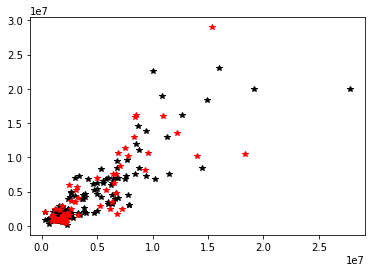

In [ ]:
best_pipeline = poly_grid.best_estimator_
# Transform the training data
if 'Furnish' in sel_feature:
    X_train_encoded = best_pipeline.named_steps['encoder'].transform(X_train)
    print(X_train_encoded)
else:
    X_train_encoded = X_train
# Transform the test data (if needed)
if 'Furnish' in sel_feature:
    X_test_encoded = best_pipeline.named_steps['encoder'].transform(X_test)
    print(X_test_encoded)
else:
    X_test_encoded = X_test


# poly_grid.fit(X_train_encoded, y_train)
# X_train_scaled = best_pipeline.named_steps['scaler'].transform(X_train)
# X_test_scaled = best_pipeline.named_steps['scaler'].transform(X_test)

# import matplotlib for visualization

import matplotlib.pyplot as plt

plt.plot(ytrain_pred,  y_train, 'k*')
plt.plot(ytest_pred,  y_test, 'r*')

# training
# plt.plot(X_train_encoded,  y_train, 'k*')
# plt.plot(X_train_encoded,  ytrain_pred, 'r*')

# testing 
# plt.plot(X_test_encoded,  y_test, 'k*')
# plt.plot(X_test_encoded,  ytest_pred, 'r*')

# plt.title("Predicted value vs. Actual value")
# plt.legend(["Training data", "Testing data"])
# plt.legend(["Actual value", "Predicted value"])
# plt.show()

# -----------------------
# # to polot MSE of three models 
# # Store the MSE values in a list
# # mse_values = [5359351883452.854, 3498738722065.829, 2283621702939.643] #training
# # mse_values = [9733080457308.262, 8554049273294.467, 2.0091991186063884e+36] #testing 
# mse_values = [9733080457308.262, 8554049273294.467] #testing 
# model_names = ['Linear Regression', 'Poly Degree 2', 'Poly Degree 3']

# # Plotting the MSE values
# plt.figure(figsize=(10, 6))
# plt.bar(model_names, mse_values, color=['blue', 'green', 'red'])
# plt.xlabel('Models')
# plt.ylabel('Mean Squared Error')
# # plt.title('Mean Squared Error of Different Models in Training Data')
# plt.title('Mean Squared Error of Different Models in Testing Data')
# plt.ylim(0, max(mse_values) * 1.1)  # Add some padding to the y-axis

# # Annotate the bars with the MSE values
# for i, v in enumerate(mse_values):
#     plt.text(i, v + max(mse_values) * 0.02, f'{v:.2f}', ha='center', va='bottom')

# plt.show()

# ----------------------
# Store the MSE values in a list
# mse_values = [5359351883452.854, 3498738722065.829, 2283621702939.643] #training
# mse_values = [9733080457308.262, 8554049273294.467, 2.0091991186063884e+36] #testing 
# mse_values = [9733080457308.262, 8554049273294.467] #testing 
# model_names = ['Linear Regression', 'Poly Degree 2']

# # Plotting the MSE values
# plt.figure(figsize=(10, 6))
# plt.bar(model_names, mse_values, color=['blue', 'green'])
# plt.xlabel('Models')
# plt.ylabel('Mean Squared Error')
# # plt.title('Mean Squared Error of Different Models in Training Data')
# plt.title('Mean Squared Error of Different Models in Testing Data')
# plt.ylim(0, max(mse_values) * 1.1)  # Add some padding to the y-axis

# # Annotate the bars with the MSE values
# for i, v in enumerate(mse_values):
#     plt.text(i, v + max(mse_values) * 0.02, f'{v:.2f}', ha='center', va='bottom')

# plt.show()

## 7. Evaluate the results using metrics

<p>Evaluating the performance of the trained linear regression model is crucial for assessing model fit, detecting overfitting, understanding prediction accuracy, comparing models, iteratively improving the model, and establishing baseline performance. </p>
<p>The model's performance should be evaluated on both the trained data and test data sets for ensuring model effectiveness and generalization ability.</p>

In [ ]:
# import the required modules
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# evauate on the training set
mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)

# evauate on the testing set
mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)

Mean absolute error:  1511473.3042306267
Mean squared error:  5542128792847.888
R2 score is:  0.740659608821473
Mean absolute error:  2046095.8514283735
Mean squared error:  10011299480294.418
R2 score is:  0.6561481316745823
